This is a jupyter notebook to create a  new dataset of representetive graphs from images.

In [1]:
import matplotlib
import random
from matplotlib import pyplot as plt
import glob
import os
import fiona
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, Polygon, shape
from shapely.geometry.multilinestring import MultiLineString
from shapely.geometry.linestring import LineString
from shapely.geometry.collection import  GeometryCollection 
from shapely.affinity import translate
from descartes.patch import PolygonPatch
import pandas as pd
import numpy as np
from shapely import ops
import pickle
from earthpy import clip as cl

# 2004

Get all data from 2004

In [3]:
#global_path = "D:/allegoria/datasets_alegoria/BD/2004/topo/dpsg2019-07-00368/BDTOPO/1_DONNEES_LIVRAISON_2019-07-00368/"
global_path = "D:/allegoria/datasets_alegoria/BD/2004/old_data_moselle/BDTOPO/1_DONNEES_LIVRAISON_2019-06-00227/"

script to find all the interesting objects and create polygons around them

In [3]:
# special buildings
fp_remk = global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/BATI_REMARQUABLE.shp"
buildings3 = gpd.read_file(fp_remk)
buildings3.NATURE.unique()

array(['Aérogare', 'Gare', 'Mairie', 'Péage', 'Préfecture',
       'Bâtiment religieux divers', 'Sous-préfecture', 'Bâtiment sportif',
       'Tour, donjon, moulin', 'Chapelle', 'Eglise', 'Tribune', 'Château',
       'Fort, blockhaus, casemate', 'Monument'], dtype=object)

In [50]:
# go through all the unique buildings, get the centers of their coordinates and create polygons which are centered around it (+/- with a random threshold)
image_polygons = buildings3.copy()
for bati in  range(len(buildings3)):
    center = buildings3.geometry[bati].centroid
    shifted_center = Point(center.x + random.randrange(-10, +10),center.y + random.randrange(-10, +10))
    polygon1 = Polygon([[shifted_center.x-100, shifted_center.y-100], [shifted_center.x+100, shifted_center.y-100], [shifted_center.x+100, shifted_center.y+100], [shifted_center.x-100, shifted_center.y+100]])
    image_polygons.geometry[bati] = polygon1
#save resulting polygons as a shape file
image_polygons.to_file('image_polygons.shp', driver='ESRI Shapefile')

C:\Users\margo\Anaconda3\envs\gdal\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [52]:
image_polygons

,ID,PREC_PLANI,PREC_ALTI,ORIGIN_BAT,NATURE,HAUTEUR,Z_MIN,Z_MAX,geometry
0,BATIMENT0000000060102862,1.5,1.0,Autre,Aérogare,6,212.1,214.4,"POLYGON ((972338.4521451127 6858812.904176963,..."
1,BATIMENT0000000060102861,1.5,1.0,Autre,Aérogare,5,213.0,213.9,"POLYGON ((972369.7176488313 6858857.627006934,..."
2,BATIMENT0000000060048570,1.5,1.0,Autre,Gare,10,311.2,315.0,"POLYGON ((1023740.587232001 6892185.196605884,..."
3,BATIMENT0000000060048971,1.5,1.0,Autre,Gare,8,344.3,347.0,"POLYGON ((1014059.432491102 6891730.093914833,..."
4,BATIMENT0000000060057787,1.5,1.0,Autre,Gare,3,258.0,258.9,"POLYGON ((1028207.313716741 6889072.727190383,..."
5,BATIMENT0000000060062490,1.5,1.0,Autre,Gare,6,242.3,245.5,"POLYGON ((1029191.435935237 6887610.110634364,..."
6,BATIMENT0000000060065513,1.5,1.0,Autre,Gare,8,394.7,399.0,"POLYGON ((1020207.662367532 6886658.657239229,..."
7,BATIMENT0000000060069152,1.5,1.0,Autre,Gare,4,221.0,221.4,"POLYGON ((1033806.739457338 6885549.937650201,..."
8,BATIMENT0000000060083662,1.5,1.0,Autre,Gare,14,270.9,278.9,"POLYGON ((967877.0733686918 6876849.989456036,..."
9,BATIMENT0000000060086408,1.5,1.0,Autre,Gare,10,252.6,256.9,"POLYGON ((974857.6038969669 6873829.377518189,..."


C:\Users\margo\Anaconda3\envs\gdal\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


(930634.0962934754, 930834.0962934754, 6887467.663696369, 6887267.663696369)

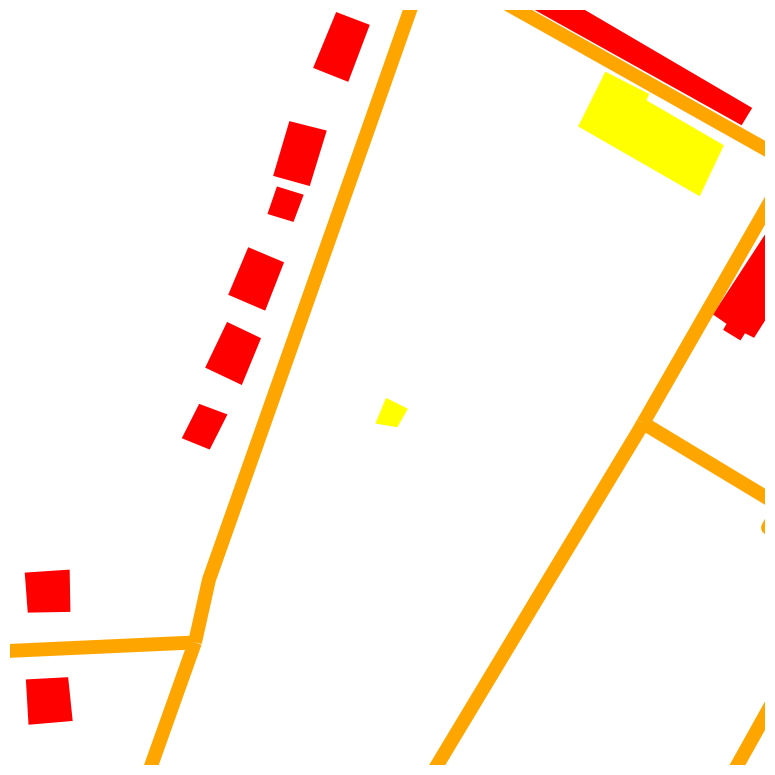

In [109]:
sg_houses_rem = buildings3[buildings3.geometry.intersects(polygon1)]
sg_water = all_water[all_water.geometry.intersects(polygon1)]
sg_roads = all_roads[all_roads.geometry.intersects(polygon1)]
sg_houses = all_buildings[all_buildings.geometry.intersects(polygon1)]
#plt.autoscale(tight=True)
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

sg_roads.plot(linewidth=10.0, edgecolor='#FFA500', color='#FFA500', ax=ax)
sg_houses_rem.plot(color='#FFFF00', ax=ax)
sg_water.plot(linewidth=10.0, color='#0000FF', ax=ax)
sg_houses.plot(color='#FF0000', ax=ax)

ax.set_xlim([polygon1.bounds[0], polygon1.bounds[2]])
ax.set_ylim([polygon1.bounds[3], polygon1.bounds[1]])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('off')
       


## Graph creation

### ROADS & RIVERS

In [4]:
# load all the shapely files related to ROADS
fp_road = global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/A_RESEAU_ROUTIER/cleaned_road_network.shp"
data_road_troncon =  gpd.read_file(fp_road)
all_roads = data_road_troncon
fp_water =  global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/D_HYDROGRAPHIE/TRONCON_COURS_EAU.shp"
all_water = gpd.read_file(fp_water)

### Houses & BATI

In [5]:
# Load all the data from the BUILDINGS caegory
fp_bati =  global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/BATI_INDIFFERENCIE.shp"
fp_inds =global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/BATI_INDUSTRIEL.shp"

# Read file using gpd.read_file()
buildings1= gpd.read_file(fp_bati)
buildings2 =gpd.read_file(fp_inds)

# concaenate the buildings into a single table
all_buildings =  pd.concat([buildings1, buildings2],ignore_index=True )

C:\Users\margo\Anaconda3\envs\gdal\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


### Remarcable buildings

In [6]:
# special buildings
fp_remk = global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/BATI_REMARQUABLE.shp"
buildings3 = gpd.read_file(fp_remk)
churches = buildings3.loc[(buildings3['NATURE'] == "Eglise") | (buildings3['NATURE'] == "Chapelle") | (buildings3['NATURE'] =="Bâtiment religieux divers")]

towers = buildings3.loc[(buildings3['NATURE'] == "Tour, donjon, moulin") | (buildings3['NATURE'] == 'Arc de triomphe')]
monuments = buildings3.loc[buildings3['NATURE'] == "Monument"]  
forts = buildings3.loc[buildings3['NATURE'] == 'Fort, blockhaus, casemate']
castels =buildings3.loc[buildings3['NATURE'] =='Château']

public_buildings = buildings3.loc[(buildings3['NATURE'] == "Préfecture") | (buildings3['NATURE'] == "Mairie") |
                                   (buildings3['NATURE'] =="Sous-préfecture")]
sport_buldings = buildings3.loc[(buildings3['NATURE'] =="Bâtiment sportif") | (buildings3['NATURE'] =="Tribune")]
gares = buildings3.loc[buildings3['NATURE'] =="Gare"]
normal_buldings = buildings3.loc[(buildings3['NATURE']== "Bâtiment religieux divers") |(buildings3['NATURE'] =="Aérogare") | (buildings3['NATURE'] =="Péage") ]
all_buildings =  pd.concat([all_buildings, normal_buldings],ignore_index=True )                                                                                        

C:\Users\margo\Anaconda3\envs\gdal\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


### SPORT TERRITORIES

In [11]:
fp_sport =global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/TERRAIN_SPORT.shp"
data_sport = gpd.read_file(fp_sport)


### CEMETRIES

In [12]:
fp_cemetries = global_path +"BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/CIMETIERE.shp"
data_cemetries = gpd.read_file(fp_cemetries)

### AERODROMES & RAILROADS

In [13]:
fp_aero = global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/E_BATI/PISTE_AERODROME.shp"
data_aero = gpd.read_file(fp_aero)
fp_rail = global_path + "BDT_2-0_SHP_LAMB93_D057-ED083/B_VOIES_FERREES_ET_AUTRES/TRONCON_VOIE_FERREE.shp"
data_rail  = gpd.read_file(fp_rail)

### BOUNDING BOXES FOR THE GRAPHS


Load the pre-calculated bounding boxes

In [14]:
image_polygons = gpd.read_file('D:/allegoria/datasets_alegoria/BD/2004/polygons_moselle/image_polygons.shp')

## Graph creation

In [64]:
### helper functions

In [15]:
def calculate_number_of_points(geometry):
    ''' function calculates number of points in the object '''
    if geometry.type == 'Polygon':
        return len(geometry.exterior.coords)
    elif geometry.type == 'LineString':
        return len(geometry.coords)
    else:
        try:
            return(len(geometry.coords))
        except:
            print(f"Error! Unknown type detected: {type(geometry)}, returning 0")
            return 0
        
def calculate_perimeter(geometry):
    ''' function calculates the perimeter of the shapely geometry '''
    return geometry.length
# unit tests
# calculate_perimeter(buildings3.geometry[1])

In [16]:
def get_node_attributes(shapely_geometry, poly_bound, nature, within_poly = True):
    """ function returns attributes of road/house node"""
    attributes = {}
    obj_type = nature
    if within_poly:
        obj_length = calculate_perimeter(shapely_geometry)
        frame_perimeter = poly_bound.length
        obj_normed_length = obj_length/frame_perimeter 
        obj_points = calculate_number_of_points(shapely_geometry)
    else:
        obj_normed_length = 0
        obj_points = 0
    attributes = {'nature': obj_type, 'normed_length':obj_normed_length, 
                 'num_points':obj_points}
    return attributes

In [17]:
def calculate_distance(obj1, obj2):
    ''' this fucntion calculates the minimum distance between the objects:
    if an object is a polygon, its center is considered as a central point
    if an object is a line, the distance is the lenght of the normal from another object,
    if both objects are lines, the distance is 0'''
    d = None
    if obj1.type == 'Polygon' and obj2.type == 'Polygon':
        #print("polyg polyg")
        proj_dist = obj1.centroid.distance(obj2.centroid) #euclidean distance
        d = proj_dist
    elif obj1.type == 'LineString' and obj2.type == 'Polygon':
        #print("linestr polyg")
        proj_dist= obj2.centroid.distance(obj1) 
#         print(proj_dist)
#         print(obj1.project(obj2.centroid))
        d = proj_dist
    elif obj2.type=='LineString' and obj1.type == 'Polygon':
        #print(" polyg linestr")
        proj_dist= obj1.centroid.distance(obj2)     
        d = proj_dist
    elif obj1.type == 'LineString' and  obj2.type=='LineString':
        #print(" linestr linestr")
        if obj1.intersects( obj2):
            d = 0
        else:
            d = None
    elif obj1.type == 'shapely.geometry.LineString' and  obj2.type=='shapely.geometry.LineString':
        #print(" linestr linestr")
        if obj1.intersects( obj2):
            d = 0
        else:
            d = None    
    else:
        print(" unkn unkn")
        try:
            print(type(obj1),type(obj2))
            d = obj2.distance(obj1.centroid)
        except:
            print('Distance calc didnt work')
            d = None
    #print(f"d is {d} for objects {type(obj1)} {type(obj2)}")
    return d

In [14]:
#calculate_distance(all_buildings.geometry[10], all_roads.geometry[100])
#all_buildings.geometry[0].centroid.distance(obj2.centroid)

In [18]:
def create_graph_where_object_is_node(gp_frame, poly = None, threshold = 100):
    ''' function takes the pandas frame and creates the graph, where the nodes are rivers and roads,
    and buildings, and sportive objects etc.
    Nodes have the following attributes: 
    a) type of object (road/water/house/church etc)
    b) num of angles / points in the shape geometry
    c) length (divided by HxW of the polygon to scale)
    Edges have the following attributes:
    a) distance between the object centers, or distance between object center and line (length of the porjection)
    '''
    pos = {} #dictionary for node coord
    net = nx.Graph() # empty graph   
    attr = {}
    for shp in range(0, len(gp_frame)-1): # for each object
        # the geometry property here may be specific to my shapefile
        object1 = gp_frame['geometry'].iloc[shp] #get the line
        pos[shp] = [gp_frame['geometry'].iloc[shp].centroid.x,  gp_frame['geometry'].iloc[shp].centroid.y]
        # get all line attributes
        attributes = get_node_attributes(object1, poly, gp_frame['nature'].iloc[shp],gp_frame['withinPoly'].iloc[shp])
        net.add_node(shp) # add node
        attr[shp]= attributes # nested dict
        for shp2 in range(shp+1, len(gp_frame)):
            object2 = gp_frame['geometry'].iloc[shp2] #get the second object
            d = calculate_distance(object1, object2)
            if d is not None and d<threshold: # if intersects               
                net.add_edge(shp, shp2, dist = d) # edge with an attribute

        # add the last element - coz first loop is not for all values, and last node needs attributes
        attributes = get_node_attributes(object2, poly, gp_frame['nature'].iloc[shp2],gp_frame['withinPoly'].iloc[shp2])
        attr[len(gp_frame)-1]= attributes # nested dict
        net.add_node(shp2) # add node 
        nx.set_node_attributes(net, attr)

        pos[shp2] = [gp_frame['geometry'].iloc[shp2].centroid.x, gp_frame['geometry'].iloc[shp2].centroid.y]

    return net, pos

In [127]:
# def clean_and_append(final_data, data_segment, nature, polygon_bbox):
#     ''' function copies data from a data frame to a new data list of a following structure:
#     nature
#     within the image (bool) if the object is entirely inside the polygon or not
#     geometry
#     returns list of lists with objects like  [[nat, within, geom], [], []...]  '''
#     # if it is line object
#     if nature in [12,13,14]:
#         for index, row in data_segment.iterrows(): # for each element
#             if not row['geometry'].within(polygon_bbox):
#                 #filer points
#                 if isinstance(row['geometry'], MultiLineString):                     
#                      for i in range(len(row['geometry'])):
#                         if not row['geometry'][i].within(poly):
#                              row['geometry'][i] = LineString([a for  a in list(row['geometry'][i].coords) if Point(a).within(polygon_bbox) is True])
                        
#                 points = [a for  a in list(row['geometry'].coords) if Point(a).within(polygon_bbox) is True]
#                 try:
#                     row['geometry'] = LineString(points)
#                 except:
# #                     intersection = (row['geometry'].intersection(polygon_bbox)) # add point
# #                     for p in intersection.coords:
# #                         points.append(p)
# #                     row['geometry'] = LineString(points)
#                     pass
#             try :  
#                 row['geometry'].centroid.x
#                 final_data.append([nature, 1, row['geometry']]) #roads are always within
#             except:
#                 print("Detected ", row['geometry'], "nature is ", nature)

#     # if it is a polygon object
#     else:
#         # check if object is completely within the polygon
#         for index, row in data_segment.iterrows(): # for each element
#             final_data.append([nature, row['geometry'].within(polygon_bbox), row['geometry']]) # polygons are classified depending on their status always within 

#     return final_data
def clean_and_append(final_data, data_segment, nature, polygon_bbox):
    ''' function copies data from a data frame to a new data list of a following structure:
    nature
    within the image (bool) if the object is entirely inside the polygon or not
    geometry
    returns list of lists with objects like  [[nat, within, geom], [], []...]  '''
    # if it is line object
    if data_segment.empty == True:
        pass     
    else:
        # check if object is completely within the polygon
        for index, row in data_segment.iterrows(): # for each element           
            if row['geometry'].geom_type == 'MultiPolygon' or row['geometry'].geom_type == 'MultiLineString':
                for single_obj in row['geometry']:
                        print("data ", len(final_data), 'obj', type(single_obj))
                        final_data.append([nature, 1, single_obj]) 
                print('a multistring detected and transformed')                       
            else:   
                final_data.append([nature, 1, row['geometry']]) # polygons are classified depending on their status always within 

    return final_data

In [56]:
def clip_data(pd_obj, pd_polyg):
    try:
        sg = cl.clip_shp(pd_obj, pd_polyg) #all_roads[all_roads.geometry.intersects(polygon_bbox)] #extract segments of roads
    except:
        sg = pd.DataFrame()
    return sg
    

In [ ]:
for i in range (1,len(image_polygons)): #
    # randomly shift the polygon box
#     randomshift_val = random.randrange(-10, +10)
#     polygon_bbox = translate(polygon_bbox, randomshift_val, randomshift_val)
    polygon_bbox = image_polygons.iloc[i-1:i]
    data = []
    # lines

    sg_roads = clip_data(all_roads, polygon_bbox)  #all_roads[all_roads.geometry.intersects(polygon_bbox)] #extract segments of roads
    data = clean_and_append(data, sg_roads, 12, polygon_bbox)
    sg_water = clip_data(all_water, polygon_bbox)#all_water[all_water.geometry.intersects(polygon_bbox)] #extract segments of water
    data = clean_and_append(data, sg_water, 13, polygon_bbox)
    sg_data_rail = clip_data(data_rail, polygon_bbox)#data_rail[data_rail.geometry.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_data_rail, 14, polygon_bbox)
    # objects
    sg_data_aero = clip_data(data_aero, polygon_bbox) # data_aero[data_aero.geometry.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_data_aero, 0, polygon_bbox)
    sg_houses = clip_data(all_buildings, polygon_bbox) #all_buildings[all_buildings.geometry.intersects(polygon_bbox)] #extract segments of buildings
    data = clean_and_append(data, sg_houses, 1, polygon_bbox)
    sg_public_buildings =  clip_data(public_buildings, polygon_bbox) #public_buildings[public_buildings.geometry.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_public_buildings, 2, polygon_bbox)
    sg_gares = clip_data(gares, polygon_bbox) #gares[gares.geometry.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_gares, 3, polygon_bbox)
    sg_sport_buil = clip_data(sport_buldings, polygon_bbox)#sport_buldings[sport_buldings.geometry.intersects(polygon_bbox) ]
    data = clean_and_append(data, sg_sport_buil, 4, polygon_bbox)
    sg_towers = clip_data(towers, polygon_bbox)#towers[towers.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_towers, 5, polygon_bbox)
    sg_churches = clip_data(churches, polygon_bbox) # churches[churches.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_churches, 6, polygon_bbox)
    sg_castels = clip_data(castels, polygon_bbox)#castels[castels.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_castels, 7, polygon_bbox)
    sg_forts = clip_data(forts, polygon_bbox)#forts[forts.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_forts, 8, polygon_bbox)
    sg_monuments = clip_data(monuments, polygon_bbox)#monuments[monuments.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_monuments, 9, polygon_bbox)
    sg_data_cemetries = clip_data(data_cemetries, polygon_bbox)#data_cemetries[data_cemetries.geometry.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_data_cemetries, 11, polygon_bbox)
    sg_sport = clip_data(data_sport, polygon_bbox)#data_sport[data_sport.geometry.intersects(polygon_bbox)] #extract segments of sport  things
    data = clean_and_append(data, sg_sport, 11, polygon_bbox)
    combined_pd = pd.DataFrame(data, columns = ['nature','withinPoly', 'geometry']) 
    sg_houses_rem =  pd.concat([sg_sport_buil,sg_towers,sg_churches,sg_castels,sg_forts,sg_monuments],ignore_index=True)
    combined_pd
    name = 'D:/allegoria/graphs/new_IGN_all_objects/2019/'+'graph'+ str(i).zfill(4)
    print(name)
    if combined_pd.empty:
         G = nx.empty_graph()
    else:
        G, pos = create_graph_where_object_is_node(gp_frame=combined_pd, poly=polygon_bbox,  threshold = 35)
    nx.write_gpickle(G, name, protocol=4)
    with open(name+'_position.pickle', 'wb') as handle:
        pickle.dump(pos, handle, protocol=pickle.HIGHEST_PROTOCOL)

D:/allegoria/graphs/new_IGN_all_objects/2019/graph0001
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0002
data  22 obj <class 'shapely.geometry.polygon.Polygon'>
data  23 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
data  25 obj <class 'shapely.geometry.polygon.Polygon'>
data  26 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0003
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0004
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0005
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0006
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0007
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0008
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0009
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0010
data  20 obj <class 'shapely.geometry.polygon.Polygon'>
data  21 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transform

data  1 obj <class 'shapely.geometry.linestring.LineString'>
data  2 obj <class 'shapely.geometry.linestring.LineString'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0074
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0075
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0076
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0077
data  25 obj <class 'shapely.geometry.polygon.Polygon'>
data  26 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
data  37 obj <class 'shapely.geometry.polygon.Polygon'>
data  38 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0078
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0079
data  41 obj <class 'shapely.geometry.polygon.Polygon'>
data  42 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
data  44 obj <class 'shapely.geometry.polygon.Polygon'>


data  18 obj <class 'shapely.geometry.polygon.Polygon'>
data  19 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0151
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0152
data  3 obj <class 'shapely.geometry.linestring.LineString'>
data  4 obj <class 'shapely.geometry.linestring.LineString'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0153
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0154
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0155
data  11 obj <class 'shapely.geometry.linestring.LineString'>
data  12 obj <class 'shapely.geometry.linestring.LineString'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0156
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0157
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0158
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0159
D:/allegoria/graphs/new_IGN_al

D:/allegoria/graphs/new_IGN_all_objects/2019/graph0219
data  19 obj <class 'shapely.geometry.polygon.Polygon'>
data  20 obj <class 'shapely.geometry.polygon.Polygon'>
data  21 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0220
data  32 obj <class 'shapely.geometry.polygon.Polygon'>
data  33 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0221
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0222
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0223
data  3 obj <class 'shapely.geometry.linestring.LineString'>
data  4 obj <class 'shapely.geometry.linestring.LineString'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0224
data  22 obj <class 'shapely.geometry.polygon.Polygon'>
data  23 obj <class 'shapely.geometry.polygon.Polygon'>
data  24 obj <class 'shapely.geometry.p

data  7 obj <class 'shapely.geometry.linestring.LineString'>
data  8 obj <class 'shapely.geometry.linestring.LineString'>
a multistring detected and transformed
data  19 obj <class 'shapely.geometry.polygon.Polygon'>
data  20 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
data  21 obj <class 'shapely.geometry.polygon.Polygon'>
data  22 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0291
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0292
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0293
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0294
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0295
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0296
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0297
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0298
data  23 obj <class 'shapely.geometry.polygon.Polygon'>
data  24 obj <class 'shapely.geometry.pol

D:/allegoria/graphs/new_IGN_all_objects/2019/graph0363
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0364
data  23 obj <class 'shapely.geometry.polygon.Polygon'>
data  24 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
data  27 obj <class 'shapely.geometry.polygon.Polygon'>
data  28 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0365
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0366
data  26 obj <class 'shapely.geometry.polygon.Polygon'>
data  27 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0367
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0368
data  20 obj <class 'shapely.geometry.polygon.Polygon'>
data  21 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
data  24 obj <class 'shapely.geometry.polygon.Polygon'>
data  25 o

D:/allegoria/graphs/new_IGN_all_objects/2019/graph0424
data  14 obj <class 'shapely.geometry.polygon.Polygon'>
data  15 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0425
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0426
data  5 obj <class 'shapely.geometry.linestring.LineString'>
data  6 obj <class 'shapely.geometry.linestring.LineString'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0427
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0428
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0429
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0430
data  11 obj <class 'shapely.geometry.polygon.Polygon'>
data  12 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0431
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0432
D:/allegoria/graphs/new_IGN_all_objects/20

data  28 obj <class 'shapely.geometry.polygon.Polygon'>
data  29 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0492
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0493
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0494
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0495
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0496
data  26 obj <class 'shapely.geometry.polygon.Polygon'>
data  27 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0497
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0498
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0499
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0500
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0501
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0502
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0503
data  20 obj <class 'shapely.geometry.

D:/allegoria/graphs/new_IGN_all_objects/2019/graph0568
data  11 obj <class 'shapely.geometry.polygon.Polygon'>
data  12 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
data  30 obj <class 'shapely.geometry.polygon.Polygon'>
data  31 obj <class 'shapely.geometry.polygon.Polygon'>
data  32 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0569
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0570
data  33 obj <class 'shapely.geometry.polygon.Polygon'>
data  34 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0571
data  35 obj <class 'shapely.geometry.polygon.Polygon'>
data  36 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0572
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0573
data  36 o

D:/allegoria/graphs/new_IGN_all_objects/2019/graph0634
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0635
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0636
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0637
data  28 obj <class 'shapely.geometry.polygon.Polygon'>
data  29 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0638
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0639
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0640
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0641
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0642
data  14 obj <class 'shapely.geometry.polygon.Polygon'>
data  15 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0643
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0644
data  24 obj <class 'shapely.geometry.polygon.Polygon'>
data  25 obj <class 'shapely.geometry

data  21 obj <class 'shapely.geometry.linestring.LineString'>
data  22 obj <class 'shapely.geometry.linestring.LineString'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0702
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0703
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0704
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0705
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0706
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0707
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0708
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0709
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0710
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0711
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0712
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0713
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0714
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0715
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0716
D:/allegoria

D:/allegoria/graphs/new_IGN_all_objects/2019/graph0761
data  17 obj <class 'shapely.geometry.linestring.LineString'>
data  18 obj <class 'shapely.geometry.linestring.LineString'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0762
data  13 obj <class 'shapely.geometry.polygon.Polygon'>
data  14 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0763
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0764
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0765
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0766
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0767
data  26 obj <class 'shapely.geometry.polygon.Polygon'>
data  27 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0768
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0769
data  19 obj <class 'shapely.geometry.po

D:/allegoria/graphs/new_IGN_all_objects/2019/graph0808
data  60 obj <class 'shapely.geometry.polygon.Polygon'>
data  61 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0809
data  10 obj <class 'shapely.geometry.linestring.LineString'>
data  11 obj <class 'shapely.geometry.linestring.LineString'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0810
data  42 obj <class 'shapely.geometry.polygon.Polygon'>
data  43 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
data  51 obj <class 'shapely.geometry.polygon.Polygon'>
data  52 obj <class 'shapely.geometry.polygon.Polygon'>
data  53 obj <class 'shapely.geometry.polygon.Polygon'>
a multistring detected and transformed
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0811
D:/allegoria/graphs/new_IGN_all_objects/2019/graph0812
data  38 obj <class 'shapely.geometry.polygon.Polygon

In [47]:
# for i in range(-2,-1, 1):
#     # randomly shift the polygon box
# #     randomshift_val = random.randrange(-10, +10)
# #     polygon_bbox = translate(polygon_bbox, randomshift_val, randomshift_val)

    sg_roads = cl.clip_shp(all_roads, image_polygons.iloc[-3:-2]) #all_roads[all_roads.geometry.intersects(polygon_bbox)] #extract segments of roads

In [51]:
sg_roads

,fid,cat,cat_,ID,PREC_PLANI,PREC_ALTI,NATURE,NUMERO,NOM_RUE_G,NOM_RUE_D,...,CODEVOIE_D,TYP_ADRES,BORNEDEB_G,BORNEDEB_D,BORNEFIN_G,BORNEFIN_D,ETAT,Z_INI,Z_FIN,geometry
56647,56648.0,63221,64707,TRONROUT0000000010350606,2.5,2.5,Route � 1 chauss�e,D5B,None,None,...,NR,Classique,0,0,0,0,NR,191.4,191.0,"LINESTRING (929352.3 6892036.7, 929352.9 68920..."
60077,60078.0,67233,68805,TRONROUT0000000010350615,2.5,2.5,Route � 1 chauss�e,D5B,None,None,...,NR,Classique,0,0,0,0,NR,190.9,191.0,"LINESTRING (929324.5 6892032.4, 929325.4 68920..."
167571,167572.0,193267,71485,TRONROUT0000000010350563,2.5,2.5,Route � 1 chauss�e,D5B,None,None,...,NR,Classique,0,0,0,0,NR,191.4,191.0,"LINESTRING (929352.3 6892036.7, 929350.3 68920..."
64494,64495.0,72516,74201,TRONROUT0000000010350611,2.5,2.5,Route � 1 chauss�e,D5B,None,None,...,NR,Classique,0,0,0,0,NR,190.9,190.9,"LINESTRING (929322.5 6892037.1, 929324.5 68920..."
56665,56666.0,63239,64725,TRONROUT0000000010350566,2.5,2.5,Route � 1 chauss�e,D5B,None,None,...,NR,Classique,0,0,0,0,NR,191.4,191.2,"LINESTRING (929352.3 6892036.7, 929351.4 68920..."
58920,58921.0,65866,67414,TRONROUT0000000010350614,2.5,2.5,Route � 1 chauss�e,D5B,None,None,...,NR,Classique,0,0,0,0,NR,190.9,190.9,"LINESTRING (929333.7 6892053.2, 929327.5 68920..."
62297,62298.0,69838,71464,TRONROUT0000000010350613,2.5,2.5,Route � 1 chauss�e,D5B,None,None,...,NR,Classique,0,0,0,0,NR,189.8,190.9,"LINESTRING (929300.4 6892064.8, 929318.9 68920..."
60076,60077.0,67232,68804,TRONROUT0000000010350605,2.5,2.5,Route � 1 chauss�e,D5B,None,None,...,NR,Classique,0,0,0,0,NR,191.2,190.9,"LINESTRING (929347.2 6892049.4, 929340.9 68920..."
158909,158910.0,179322,182915,TRONROUT0000000010350529,2.5,9999.0,Route � 1 chauss�e,NC,R DU 11E D'AVIATION,R DU 11E D'AVIATION,...,574470663,Classique,0,0,0,0,NR,-99.0,-99.0,LINESTRING (929404.0499156963 6892073.42098942...
61222,61223.0,68551,70147,TRONROUT0000000010350612,2.5,2.5,Route � 1 chauss�e,D5B,None,None,...,NR,Classique,0,0,0,0,NR,190.9,189.8,"LINESTRING (929333.7 6892053.2, 929300.4 68920..."


In [37]:
image_polygons.iloc[i].shape

(9,)

In [38]:
all_roads.shape

(168746, 36)

In [26]:
all_roads

,fid,cat,cat_,ID,PREC_PLANI,PREC_ALTI,NATURE,NUMERO,NOM_RUE_G,NOM_RUE_D,...,CODEVOIE_D,TYP_ADRES,BORNEDEB_G,BORNEDEB_D,BORNEFIN_G,BORNEFIN_D,ETAT,Z_INI,Z_FIN,geometry
0,1.0,9436,9758,TRONROUT0000000060228741,1.5,1.0,Route � 1 chauss�e,D38,RTE DE METZ,RTE DE METZ,...,574900140,NR,0,0,0,0,NR,205.0,205.3,"LINESTRING (962057.3 6859308.6, 962064.3 68593..."
1,2.0,4841,5065,TRONROUT0000000060238614,1.5,1.0,Route � 1 chauss�e,D89,None,None,...,NR,NR,0,0,0,0,NR,215.8,215.6,"LINESTRING (971277.2 6853371.5, 971281.9 68533..."
2,3.0,8553,8859,TRONROUT0000000060208570,1.5,1.0,Route � 1 chauss�e,D88A,None,None,...,NR,NR,0,0,0,0,NR,235.1,223.3,"LINESTRING (987401.5 6879855.7, 987395.2 68798..."
3,4.0,7666,7945,TRONROUT0000000060248413,1.5,1.0,Route � 1 chauss�e,D96G,HEILLE,HEILLE,...,57461B033,Classique,0,0,0,0,NR,324.3,322.7,"LINESTRING (997815.3 6843992.7, 997827.5 68439..."
4,5.0,3920,4123,TRONROUT0000000060228447,1.5,1.0,Route � 1 chauss�e,D27,None,None,...,NR,NR,0,0,0,0,NR,278.0,270.3,"LINESTRING (990538.9 6859863.4, 990677.1 68597..."
5,6.0,2992,3179,TRONROUT0000000060218306,1.5,1.0,Route � 1 chauss�e,D27,R PRINCIPALE,R PRINCIPALE,...,571810007,Autre,62,4,63,1,NR,223.9,220.3,"LINESTRING (980280.1 6868973, 980263.8 6868955..."
6,7.0,7680,7960,TRONROUT0000000060218333,1.5,1.0,Route � 1 chauss�e,D22,None,None,...,NR,NR,0,0,0,0,NR,221.7,222.8,"LINESTRING (976280.2 6868972.7, 976283.7 68689..."
7,8.0,9480,9804,TRONROUT0000000060238271,1.5,1.0,Route � 1 chauss�e,D42,RTE DE LORQUIN,RTE DE LORQUIN,...,573440093,Classique,0,0,0,0,NR,254.2,255.8,"LINESTRING (996167.8 6852617.2, 996164.4 68526..."
8,9.0,4886,5110,TRONROUT0000000060238144,1.5,1.0,Route � 1 chauss�e,D96,R DES VOSGES,R DES VOSGES,...,571130080,NR,0,0,0,0,NR,295.2,293.2,"LINESTRING (1001468.8 6852521.1, 1001475.4 685..."
9,10.0,6084,6332,TRONROUT0000000060250175,1.5,1.0,Route � 1 chauss�e,D41,RTE DE NIDERHOFF,RTE DE NIDERHOFF,...,573740160,Classique,0,3,0,3,NR,301.7,290.8,"LINESTRING (996219.2 6841689.2, 996200.9 68417..."


In [406]:
combined_pd

,nature,withinPoly,geometry
0,12,1,"LINESTRING (942257.2 6916960.3, 942270.5 69169..."
1,12,1,"LINESTRING (942320.1 6916798.8, 942318.1 69168..."
2,12,1,"LINESTRING (942302.5 6916913.9, 942326.7 69168..."
3,12,1,"LINESTRING (942352.2 6916913.2, 942369.7 69169..."
4,12,1,"LINESTRING (942438.7 6916881.9, 942434.5 69168..."
5,12,1,"LINESTRING (942352.2 6916913.2, 942368.2 69168..."
6,12,1,"LINESTRING (942369.7 6916918.6, 942370.9 69169..."
7,12,1,"LINESTRING (942352.2 6916913.2, 942346.7 69169..."
8,12,1,"LINESTRING (942392.9 6916987.7, 942368.6 69169..."
9,13,1,"LINESTRING Z (942261.3 6916917.7 194.9, 942273..."


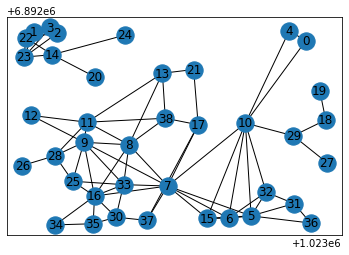

In [129]:
nx.draw_networkx(G, pos=pos, with_labels = True)

In [415]:
pos

{0: [930833.8935641379, 6887403.614552403],
 19: [930801.6622411731, 6887441.018018543],
 1: [930794.3123217454, 6887282.0780183785],
 2: [930816.9, 6887350.799999999],
 3: [930788.7743003774, 6887398.764283283],
 4: [930639.1499999998, 6887437.2],
 5: [930662.1, 6887494.2],
 6: [930705.3329442872, 6887366.5011888975],
 7: [930707.0537806178, 6887319.105804047],
 8: [930644.3493044821, 6887450.647501288],
 9: [930644.2485673692, 6887421.698768648],
 10: [930876.3947795779, 6887335.817296815],
 11: [930699.3644602211, 6887338.887318159],
 12: [930721.9820561819, 6887277.438970637],
 13: [930685.638425277, 6887378.005337803],
 14: [930693.3398491725, 6887358.649268679],
 15: [930710.8679480541, 6887305.63741479],
 16: [930795.6598702408, 6887276.678933618],
 17: [930803.7375866361, 6887300.5499220835],
 18: [930735.0962934754, 6887374.663696369]}

(1023728.542285161, 1023952.7740241734, 6892175.196605884, 6892395.196605884)

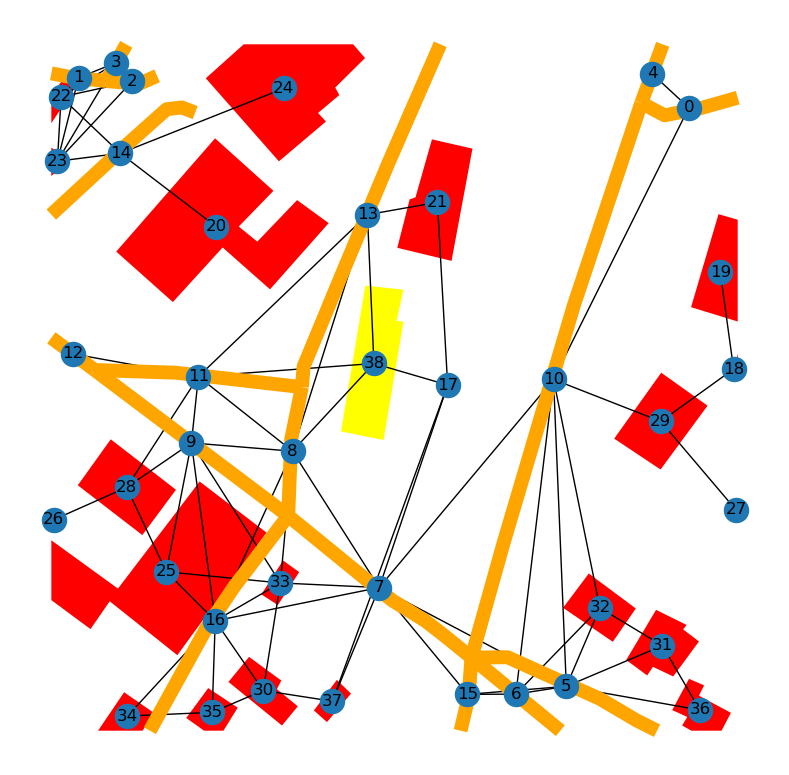

In [132]:
#plt.autoscale(tight=True)
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
# try:
sg_houses_rem = buildings3[buildings3.geometry.intersects(polygon_bbox)]
sg_roads.plot(linewidth=10.0, edgecolor='#FFA500', color='#FFA500', ax=ax)
#sg_water.plot(linewidth=10.0, color='#0000FF', ax=ax)
sg_houses.plot(color='#FF0000', ax=ax)
sg_houses_rem.plot(color='#FFFF00', ax=ax)
# except:
#     pass

nx.draw_networkx(G, pos=pos, with_labels = True, ax = ax)
# ax.set_xlim([polygon_bbox.bounds[0], polygon_bbox.bounds[2]])
# ax.set_ylim([polygon_bbox.bounds[3], polygon_bbox.bounds[1]])
# ax.set_xticklabels([])
# ax.set_yticklabels([])
ax.axis('off')
       

In [119]:
sg_water

,ID,PREC_PLANI,PREC_ALTI,ARTIF,FICTIF,FRANCHISST,NOM,POS_SOL,REGIME,Z_INI,Z_FIN,geometry


In [32]:
churches

,ID,PREC_PLANI,PREC_ALTI,ORIGIN_BAT,NATURE,HAUTEUR,Z_MIN,Z_MAX,geometry
835,BATIMENT0000000060084467,1.5,1.0,Autre,Bâtiment religieux divers,29,300.9,318.4,"POLYGON Z ((967202.1 6875908.7 301.4, 967227.3..."
836,BATIMENT0000000060088593,1.5,1.0,Autre,Bâtiment religieux divers,7,261.4,262.3,"POLYGON Z ((995485.3 6870329.3 262.3, 995494.6..."
837,BATIMENT0000000059970987,2.5,2.5,BDTopo,Bâtiment religieux divers,5,203.2,203.5,"POLYGON Z ((956829.7 6916544 203.2, 956850.4 6..."
838,BATIMENT0000000060010593,2.5,2.5,BDTopo,Bâtiment religieux divers,5,251.9,252.7,"POLYGON Z ((972303 6901420.3 251.9, 972297.8 6..."
839,BATIMENT0000000059971046,2.5,2.5,BDTopo,Bâtiment religieux divers,10,211.5,213.6,"POLYGON Z ((956901.7 6915928.9 211.5, 956893.9..."
840,BATIMENT0000000059971035,2.5,2.5,BDTopo,Bâtiment religieux divers,4,200.4,200.5,"POLYGON Z ((956819.3 6916494.7 200.4, 956824 6..."
841,BATIMENT0000000059978151,2.5,2.5,BDTopo,Bâtiment religieux divers,27,288.8,312.5,"POLYGON Z ((981306 6908307.2 290.5, 981298.3 6..."
842,BATIMENT0000000059978156,2.5,2.5,BDTopo,Bâtiment religieux divers,11,280.5,287.6,"POLYGON Z ((981352.6 6908720.3 280.9, 981333.2..."
843,BATIMENT0000000059978659,2.5,2.5,BDTopo,Bâtiment religieux divers,4,220.6,220.6,"POLYGON Z ((964748.5 6908731 220.6, 964754.4 6..."
844,BATIMENT0000000059991040,2.5,2.5,BDTopo,Bâtiment religieux divers,14,230.5,232.0,"POLYGON Z ((983900.4 6905417 230.5, 983905.8 6..."


In [31]:
churches = buildings3.loc[(buildings3['NATURE'] == "Eglise") | (buildings3['NATURE'] == "Chapelle") | (buildings3['NATURE'] =="Bâtiment religieux divers")]

In [46]:
sg_churches

,ID,PREC_PLANI,PREC_ALTI,ORIGIN_BAT,NATURE,HAUTEUR,Z_MIN,Z_MAX,geometry


In [84]:
all_buildings

,HAUTEUR,ID,NATURE,ORIGIN_BAT,PREC_ALTI,PREC_PLANI,Z_MAX,Z_MIN,geometry
0,6,BATIMENT0000000060085452,NaN,Autre,1.0,1.5,258.6,257.9,"POLYGON Z ((967224.6 6875480.2 257.9, 967219.5..."
1,5,BATIMENT0000000059961560,NaN,Autre,1.0,1.5,351.0,349.4,"POLYGON Z ((950311.7 6933157.5 349.4, 950317.6..."
2,8,BATIMENT0000000059962256,NaN,Autre,1.0,1.5,153.8,153.6,"POLYGON Z ((941310.4 6932452.3 153.8, 941297.3..."
3,6,BATIMENT0000000059963695,NaN,Autre,1.0,1.5,153.7,153.5,"POLYGON Z ((938865.8 6930213.1 153.7, 938872.2..."
4,5,BATIMENT0000000059964233,NaN,Autre,1.0,1.5,285.5,284.9,"POLYGON Z ((956046.6 6928882.1 284.9, 956042.7..."
5,5,BATIMENT0000000059964332,NaN,Autre,1.0,1.5,306.5,306.4,"POLYGON Z ((952668.4 6928857.9 306.5, 952674.5..."
6,4,BATIMENT0000000059964855,NaN,Autre,1.0,1.5,277.8,277.2,"POLYGON Z ((943353.3 6927350.1 277.8, 943366.3..."
7,4,BATIMENT0000000059964866,NaN,Autre,1.0,1.5,254.9,254.1,"POLYGON Z ((943089.1 6926806.7 254.7, 943101 6..."
8,7,BATIMENT0000000059964971,NaN,Autre,1.0,1.5,175.9,175.4,"POLYGON Z ((938287.2 6926837.8 175.4, 938296.6..."
9,5,BATIMENT0000000059965046,NaN,Autre,1.0,1.5,260.4,258.2,"POLYGON Z ((958719.6 6926362.5 260.4, 958711.7..."


In [103]:
result = pd.merge(all_buildings, buildings3, how='inner', on=['ID'])

In [104]:
result

,HAUTEUR_x,ID,NATURE_x,ORIGIN_BAT_x,PREC_ALTI_x,PREC_PLANI_x,Z_MAX_x,Z_MIN_x,geometry_x,PREC_PLANI_y,PREC_ALTI_y,ORIGIN_BAT_y,NATURE_y,HAUTEUR_y,Z_MIN_y,Z_MAX_y,geometry_y
0,6,BATIMENT0000000060102862,Aérogare,Autre,1.0,1.5,214.4,212.1,"POLYGON Z ((972439.9 6858925.2 212.1, 972443.5...",1.5,1.0,Autre,Aérogare,6,212.1,214.4,"POLYGON Z ((972439.9 6858925.2 212.1, 972443.5..."
1,5,BATIMENT0000000060102861,Aérogare,Autre,1.0,1.5,213.9,213.0,"POLYGON Z ((972496.1 6858967.9 213.8, 972459.4...",1.5,1.0,Autre,Aérogare,5,213.0,213.9,"POLYGON Z ((972496.1 6858967.9 213.8, 972459.4..."
2,9,BATIMENT0000000060028927,Péage,Autre,1.0,1.5,295.1,295.1,"POLYGON Z ((981457.4 6896833.7 295.1, 981464.8...",1.5,1.0,Autre,Péage,9,295.1,295.1,"POLYGON Z ((981457.4 6896833.7 295.1, 981464.8..."
3,8,BATIMENT0000000060049993,Péage,Autre,1.0,1.5,238.0,237.8,"POLYGON Z ((986251.5 6892479.7 238, 986259.4 6...",1.5,1.0,Autre,Péage,8,237.8,238.0,"POLYGON Z ((986251.5 6892479.7 238, 986259.4 6..."
4,7,BATIMENT0000000060022013,Péage,BDTopo,2.5,2.5,260.6,260.6,"POLYGON Z ((970041.7 6899201.9 260.6, 970040.5...",2.5,2.5,BDTopo,Péage,7,260.6,260.6,"POLYGON Z ((970041.7 6899201.9 260.6, 970040.5..."
5,7,BATIMENT0000000060022007,Péage,BDTopo,2.5,2.5,255.7,255.7,"POLYGON Z ((970861.7 6899313.4 255.7, 970861.5...",2.5,2.5,BDTopo,Péage,7,255.7,255.7,"POLYGON Z ((970861.7 6899313.4 255.7, 970861.5..."
6,7,BATIMENT0000000060022006,Péage,BDTopo,2.5,2.5,255.9,255.7,"POLYGON Z ((970876.7 6899261.9 255.8, 970877.1...",2.5,2.5,BDTopo,Péage,7,255.7,255.9,"POLYGON Z ((970876.7 6899261.9 255.8, 970877.1..."
7,7,BATIMENT0000000060022381,Péage,BDTopo,2.5,2.5,250.9,250.6,"POLYGON Z ((952796.2 6898963.6 250.8, 952796.1...",2.5,2.5,BDTopo,Péage,7,250.6,250.9,"POLYGON Z ((952796.2 6898963.6 250.8, 952796.1..."
8,5,BATIMENT0000000060022380,Péage,BDTopo,2.5,2.5,252.2,251.9,"POLYGON Z ((952801.9 6899015.3 251.9, 952800.5...",2.5,2.5,BDTopo,Péage,5,251.9,252.2,"POLYGON Z ((952801.9 6899015.3 251.9, 952800.5..."
9,8,BATIMENT0000000060032081,Péage,BDTopo,2.5,2.5,293.0,293.0,"POLYGON Z ((981256.1 6896688.5 293, 981267.6 6...",2.5,2.5,BDTopo,Péage,8,293.0,293.0,"POLYGON Z ((981256.1 6896688.5 293, 981267.6 6..."


In [105]:
# all_buildings = pd.merge(all_buildings, result, how='left', on=['Z_MAX','Z_MIN'])
#df = all_buildings.merge(result, indicator='i', how='outer',  on=['ID']).query('i == "right_only"').drop('i', 1)

In [108]:
df= all_buildings.loc[pd.merge(all_buildings,result, on=['ID'], how='left', indicator=True)['_merge'] == 'left_only']

In [109]:
df

,HAUTEUR,ID,NATURE,ORIGIN_BAT,PREC_ALTI,PREC_PLANI,Z_MAX,Z_MIN,geometry
0,6,BATIMENT0000000060085452,NaN,Autre,1.0,1.5,258.6,257.9,"POLYGON Z ((967224.6 6875480.2 257.9, 967219.5..."
1,5,BATIMENT0000000059961560,NaN,Autre,1.0,1.5,351.0,349.4,"POLYGON Z ((950311.7 6933157.5 349.4, 950317.6..."
2,8,BATIMENT0000000059962256,NaN,Autre,1.0,1.5,153.8,153.6,"POLYGON Z ((941310.4 6932452.3 153.8, 941297.3..."
3,6,BATIMENT0000000059963695,NaN,Autre,1.0,1.5,153.7,153.5,"POLYGON Z ((938865.8 6930213.1 153.7, 938872.2..."
4,5,BATIMENT0000000059964233,NaN,Autre,1.0,1.5,285.5,284.9,"POLYGON Z ((956046.6 6928882.1 284.9, 956042.7..."
5,5,BATIMENT0000000059964332,NaN,Autre,1.0,1.5,306.5,306.4,"POLYGON Z ((952668.4 6928857.9 306.5, 952674.5..."
6,4,BATIMENT0000000059964855,NaN,Autre,1.0,1.5,277.8,277.2,"POLYGON Z ((943353.3 6927350.1 277.8, 943366.3..."
7,4,BATIMENT0000000059964866,NaN,Autre,1.0,1.5,254.9,254.1,"POLYGON Z ((943089.1 6926806.7 254.7, 943101 6..."
8,7,BATIMENT0000000059964971,NaN,Autre,1.0,1.5,175.9,175.4,"POLYGON Z ((938287.2 6926837.8 175.4, 938296.6..."
9,5,BATIMENT0000000059965046,NaN,Autre,1.0,1.5,260.4,258.2,"POLYGON Z ((958719.6 6926362.5 260.4, 958711.7..."


## 2019

In [6]:
global_path = "D:/allegoria/datasets_alegoria/BD/BD_topo/moselle/BDTOPO_3-0_TOUSTHEMES_SHP_LAMB93_D057_2019-03-19/BDTOPO/1_DONNEES_LIVRAISON_2019-03-00260/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/"

### load data

In [22]:
#roads
fp_road = global_path + "TRANSPORT/troncon2019.shp"
data_road_troncon =  gpd.read_file(fp_road)
all_roads=  data_road_troncon
#rivers
fp_water =  global_path + "HYDROGRAPHIE/COURS_D_EAU.shp"
all_water = gpd.read_file(fp_water)
#
fp_bati = global_path + "/BATI/BATIMENT.shp"
all_buildings= gpd.read_file(fp_bati)

churches = all_buildings.loc[(all_buildings['NATURE'] == "Eglise") | (all_buildings['NATURE'] == "Chapelle") | (all_buildings['NATURE'] =="Bâtiment religieux divers")]
towers = all_buildings.loc[(all_buildings['NATURE'] == "Tour, donjon, moulin") | (all_buildings['NATURE'] == 'Arc de triomphe')]
monuments = all_buildings.loc[all_buildings['NATURE'] == "Monument"]  
forts = all_buildings.loc[all_buildings['NATURE'] == 'Fort, blockhaus, casemate']
castels =all_buildings.loc[all_buildings['NATURE'] =='Château']
sport_buldings = all_buildings.loc[(all_buildings['NATURE'] =="Bâtiment sportif") | (all_buildings['NATURE'] =="Tribune")]
# remove all the special buildings from regular buildings
result = pd.concat([churches, towers, monuments, forts, castels,sport_buldings],ignore_index=True )                                                                                        
all_buildings= all_buildings.loc[pd.merge(all_buildings,result, on=['ID'], how='left', indicator=True)['_merge'] == 'left_only']                                                                                    
#
fp_sport = global_path +  "/BATI/TERRAIN_DE_SPORT.shp"
data_sport = gpd.read_file(fp_sport)
#
fp_cemetries = global_path +  "/BATI/CIMETIERE.shp"
data_cemetries = gpd.read_file(fp_cemetries)
#
fp_aero = global_path + "/TRANSPORT/AERODROME.shp"
fp_pistes = global_path + "/TRANSPORT/PISTE_D_AERODROME.shp"
data_aero =  gpd.read_file(fp_aero)
data_p =  gpd.read_file(fp_pistes)
data_aero = pd.concat([data_aero,data_p],ignore_index=True ) 

fp_rail = global_path +"/TRANSPORT/TRONCON_DE_VOIE_FERREE.shp"
data_rail = gpd.read_file(fp_rail)


### graph creation

In [70]:
image_polygons = gpd.read_file('D:/allegoria/datasets_alegoria/BD/2004/polygons_moselle/image_polygons.shp')

In [69]:
image_polygons

,ID,PREC_PLANI,PREC_ALTI,ORIGIN_BAT,NATURE,HAUTEUR,Z_MIN,Z_MAX,geometry
0,BATIMENT0000000060102862,1.5,1.0,Autre,Aérogare,6,212.1,214.4,"POLYGON ((972338.4521451127 6858812.904176963,..."
1,BATIMENT0000000060102861,1.5,1.0,Autre,Aérogare,5,213.0,213.9,"POLYGON ((972369.7176488313 6858857.627006934,..."
2,BATIMENT0000000060048570,1.5,1.0,Autre,Gare,10,311.2,315.0,"POLYGON ((1023740.587232001 6892185.196605884,..."
3,BATIMENT0000000060048971,1.5,1.0,Autre,Gare,8,344.3,347.0,"POLYGON ((1014059.432491102 6891730.093914833,..."
4,BATIMENT0000000060057787,1.5,1.0,Autre,Gare,3,258.0,258.9,"POLYGON ((1028207.313716741 6889072.727190383,..."
5,BATIMENT0000000060062490,1.5,1.0,Autre,Gare,6,242.3,245.5,"POLYGON ((1029191.435935237 6887610.110634364,..."
6,BATIMENT0000000060065513,1.5,1.0,Autre,Gare,8,394.7,399.0,"POLYGON ((1020207.662367532 6886658.657239229,..."
7,BATIMENT0000000060069152,1.5,1.0,Autre,Gare,4,221.0,221.4,"POLYGON ((1033806.739457338 6885549.937650201,..."
8,BATIMENT0000000060083662,1.5,1.0,Autre,Gare,14,270.9,278.9,"POLYGON ((967877.0733686918 6876849.989456036,..."
9,BATIMENT0000000060086408,1.5,1.0,Autre,Gare,10,252.6,256.9,"POLYGON ((974857.6038969669 6873829.377518189,..."


In [71]:
image_polygons

,ID,PREC_PLANI,PREC_ALTI,ORIGIN_BAT,NATURE,HAUTEUR,Z_MIN,Z_MAX,geometry
0,BATIMENT0000000060102862,1.5,1.0,Autre,Aérogare,6,212.1,214.4,"POLYGON ((972338.4521451127 6858812.904176963,..."
1,BATIMENT0000000060102861,1.5,1.0,Autre,Aérogare,5,213.0,213.9,"POLYGON ((972369.7176488313 6858857.627006934,..."
2,BATIMENT0000000060048570,1.5,1.0,Autre,Gare,10,311.2,315.0,"POLYGON ((1023740.587232001 6892185.196605884,..."
3,BATIMENT0000000060048971,1.5,1.0,Autre,Gare,8,344.3,347.0,"POLYGON ((1014059.432491102 6891730.093914833,..."
4,BATIMENT0000000060057787,1.5,1.0,Autre,Gare,3,258.0,258.9,"POLYGON ((1028207.313716741 6889072.727190383,..."
5,BATIMENT0000000060062490,1.5,1.0,Autre,Gare,6,242.3,245.5,"POLYGON ((1029191.435935237 6887610.110634364,..."
6,BATIMENT0000000060065513,1.5,1.0,Autre,Gare,8,394.7,399.0,"POLYGON ((1020207.662367532 6886658.657239229,..."
7,BATIMENT0000000060069152,1.5,1.0,Autre,Gare,4,221.0,221.4,"POLYGON ((1033806.739457338 6885549.937650201,..."
8,BATIMENT0000000060083662,1.5,1.0,Autre,Gare,14,270.9,278.9,"POLYGON ((967877.0733686918 6876849.989456036,..."
9,BATIMENT0000000060086408,1.5,1.0,Autre,Gare,10,252.6,256.9,"POLYGON ((974857.6038969669 6873829.377518189,..."


In [39]:
image_polygons = gpd.read_file('D:/allegoria/datasets_alegoria/BD/2004/polygons_moselle/image_polygons.shp')

In [122]:
for i in range (1,len(image_polygons)): #
    polygon_bbox = image_polygons.iloc[i-1:i]
    # randomly shift the polygon box
    randomshift_val = random.randrange(-10, +10)
    polygon_bbox.geometry = translate(polygon_bbox.geometry randomshift_val, randomshift_val)
    data = []
    # lines
    sg_roads = clip_data(all_roads, polygon_bbox)  #all_roads[all_roads.geometry.intersects(polygon_bbox)] #extract segments of roads
    data = clean_and_append(data, sg_roads, 12, polygon_bbox)
    sg_water = clip_data(all_water, polygon_bbox)#all_water[all_water.geometry.intersects(polygon_bbox)] #extract segments of water
    data = clean_and_append(data, sg_water, 13, polygon_bbox)
    sg_data_rail = clip_data(data_rail, polygon_bbox)#data_rail[data_rail.geometry.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_data_rail, 14, polygon_bbox)
    # objects
    sg_data_aero = data_aero[data_aero.geometry.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_data_aero, 0, polygon_bbox)
    sg_houses = all_buildings[all_buildings.geometry.intersects(polygon_bbox)] #extract segments of buildings
    data = clean_and_append(data, sg_houses, 1, polygon_bbox)
    sg_sport_buil = sport_buldings[sport_buldings.geometry.intersects(polygon_bbox) ]
    data = clean_and_append(data, sg_sport_buil, 4, polygon_bbox)
    sg_towers = towers[towers.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_towers, 5, polygon_bbox)
    sg_churches = churches[churches.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_churches, 6, polygon_bbox)
    sg_castels = castels[castels.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_castels, 7, polygon_bbox)
    sg_forts = forts[forts.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_forts, 8, polygon_bbox)
    sg_monuments = monuments[monuments.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_monuments, 9, polygon_bbox)
    sg_data_cemetries = data_cemetries[data_cemetries.geometry.intersects(polygon_bbox)]
    data = clean_and_append(data, sg_data_cemetries, 11, polygon_bbox)
    sg_sport = data_sport[data_sport.geometry.intersects(polygon_bbox)] #extract segments of sport  things
    data = clean_and_append(data, sg_sport, 11, polygon_bbox)
    combined_pd = pd.DataFrame(data, columns = ['nature','withinPoly', 'geometry']) 
    sg_houses_rem =  pd.concat([sg_sport_buil,sg_towers,sg_churches,sg_castels,sg_forts,sg_monuments],ignore_index=True)
    combined_pd
    name = 'D:/allegoria/graphs/new_IGN_all_objects/2019/'+'graph'+ str(i).zfill(4)
    print(name)
    if combined_pd.empty:
         G = nx.empty_graph()
    else:
        G, pos = create_graph_where_object_is_node(gp_frame=combined_pd, poly=polygon_bbox,  threshold = 35)
    nx.write_gpickle(G, name, protocol=4)
    with open(name+'_position.pickle', 'wb') as handle:
        pickle.dump(pos, handle, protocol=pickle.HIGHEST_PROTOCOL)

D:/allegoria/graphs/new_IGN_all_objects/2019/graph0000


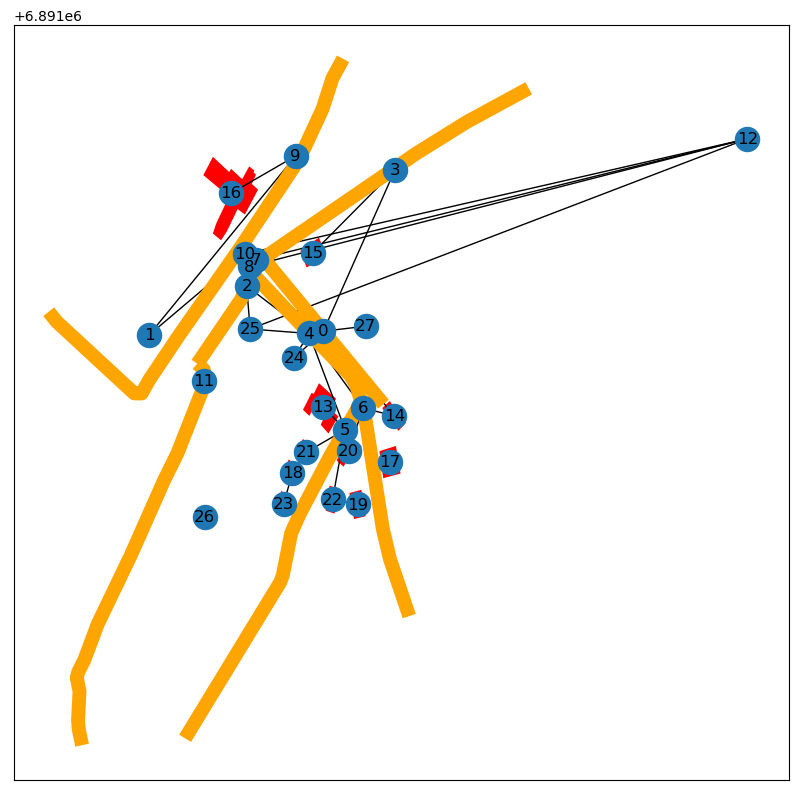

In [26]:
#plt.autoscale(tight=True)
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
# try:
sg_roads.plot(linewidth=10.0, edgecolor='#FFA500', color='#FFA500', ax=ax)
#sg_water.plot(linewidth=10.0, color='#0000FF', ax=ax)
sg_houses.plot(color='#FF0000', ax=ax)
sg_houses_rem.plot(color='#FFFF00', ax=ax)
# except:
#     pass

nx.draw_networkx(G, pos=pos, with_labels = True, ax = ax)
# ax.set_xlim([polygon_bbox.bounds[2], polygon_bbox.bounds[0]])
# ax.set_ylim([polygon_bbox.bounds[1], polygon_bbox.bounds[3]])
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.axis('off')
       

In [86]:
polygon_bbox.bounds

(972338.4521451127, 6858812.9041769635, 972538.4521451127, 6859012.9041769635)